In [4]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set_style('darkgrid')


In [5]:
#Load the dataset
df = pd.read_csv('zomato.csv')
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [34]:
#Understanding the dataset
print(df.shape)
print("\n")
print(df.info())
print("\n")
df.dtypes

(41190, 10)


<class 'pandas.core.frame.DataFrame'>
Index: 41190 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  41190 non-null  object 
 1   Takes online orders?  41190 non-null  object 
 2   Has table booking?    41190 non-null  object 
 3   Ratings               41190 non-null  float64
 4   Votes                 41190 non-null  int64  
 5   Rest_Type             41190 non-null  object 
 6   Cuisines              41190 non-null  object 
 7   Cost                  41190 non-null  float64
 8   Type                  41190 non-null  object 
 9   City                  41190 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.5+ MB
None




Name                     object
Takes online orders?     object
Has table booking?       object
Ratings                 float64
Votes                     int64
Rest_Type                object
Cuisines                 object
Cost                    float64
Type                     object
City                     object
dtype: object

In [7]:
#Dropping unnecessary columns
df.drop(['url','address','phone','location','dish_liked','reviews_list','menu_item'],axis=1,inplace=True)
df

,name,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Bar,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [8]:
#Renaming the columns
df=df.rename(columns={"name":'Name','rate':'Ratings','votes':'Votes','rest_type':'Rest_Type','cuisines':'Cuisines','approx_cost(for two people)':'Cost','listed_in(type)':'Type','listed_in(city)':'City','online_order':'Takes online orders?','book_table':'Has table booking?'})
df.sample(5)

,Name,Takes online orders?,Has table booking?,Ratings,Votes,Rest_Type,Cuisines,Cost,Type,City
42499,Tandoor,Yes,Yes,3.9 /5,1373,Fine Dining,North Indian,"2,100",Delivery,MG Road
34878,Shanmukha,Yes,No,4.0 /5,998,Casual Dining,"Biryani, Andhra, North Indian, Chinese",800,Delivery,Koramangala 7th Block
8908,Anika's India Kitchen,Yes,No,3.3/5,5,Delivery,"Biryani, North Indian",250,Delivery,BTM
13570,Paratha House,Yes,No,3.6/5,33,Quick Bites,"North Indian, Chinese",350,Delivery,Electronic City
32104,Barleyz,No,No,3.7 /5,4652,"Lounge, Microbrewery","North Indian, Continental, Chinese","2,000",Buffet,Koramangala 6th Block


In [9]:
#Find duplicate rows
sum(df.duplicated())

124

In [10]:
#Dropping duplicate rows
df = df.drop_duplicates()
df

,Name,Takes online orders?,Has table booking?,Ratings,Votes,Rest_Type,Cuisines,Cost,Type,City
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Bar,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [11]:
#Cleaning individual rows

""" i.) remove redundant data from the ‘Name’ column. This involves removing punctuation, numbers, special characters, etc., and retaining only alphabets. """

def name_clean(text):
    return re.sub(r"[^a-zA-Z0-9 ]", "", text)

df['Name'] = df['Name'].apply(lambda x: name_clean(x))
df.Name

0                                                    Jalsa
1                                           Spice Elephant
2                                          San Churro Cafe
3                                    Addhuri Udupi Bhojana
4                                            Grand Village
                               ...                        
51712        Best Brews  Four Points by Sheraton Bengaluru
51713                             Vinod Bar And Restaurant
51714    Plunge  Sheraton Grand Bengaluru Whitefield Ho...
51715    Chime  Sheraton Grand Bengaluru Whitefield Hotel 
51716                          The Nest  The Den Bengaluru
Name: Name, Length: 51593, dtype: object

In [12]:
""" ii.) Let us now look at the ‘Ratings’ column """

df.Ratings.unique()


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
""" iii.) We can see that we have ‘nan,’ ‘NEW,’ and ‘-‘ values that do not have any ratings, and also, the values are strings containing ‘/5’. Let us remove all insignificant data and convert the ratings into numeric values. """

## removing 'nan', 'NEW', '-' values
df['Ratings'] = df['Ratings'].replace('nan',np.nan)
df['Ratings'] = df['Ratings'].replace('NaN',np.nan)
df["Ratings"] = df["Ratings"].replace("NEW", np.nan)
df['Ratings'] = df['Ratings'].replace('-',np.nan)

In [14]:
## function to remove '/5'
def remove_5(value: str):
    if type(value) == str:
        value_new = value.split('/')[0]
        return value_new
    return value
df['Ratings'] = df['Ratings'].apply(remove_5)
df['Ratings'].unique()
#the result is nan from numpy

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', nan, '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [15]:
## converting to float type data

df['Ratings'] = df['Ratings'].astype(float)

df['Ratings'].dtypes

dtype('float64')

In [16]:
""" iv.) Noticing the ‘cost’ attribute, we can observe that they are string values containing commas. Below is the code to convert them into numbers. """
## function to remove commas and convert the values
## into numbers
def cost(value):
    value = str(value)
    if "," in value:
        value = float(value.replace(",",""))
        return value
    else:
        return float(value)
df['Cost'] = df['Cost'].apply(cost)
df['Cost']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: Cost, Length: 51593, dtype: float64

In [17]:
""" v.) Handling missing data """
print(df.isnull().sum()) # find total missing data in each columns.

print([features for features in df.columns if df[features].isnull().sum()>0]) #for loop > if total missing data in column more than 0 append it to the list.

Name                        0
Takes online orders?        0
Has table booking?          0
Ratings                 10003
Votes                       0
Rest_Type                 227
Cuisines                   45
Cost                      344
Type                        0
City                        0
dtype: int64
['Ratings', 'Rest_Type', 'Cuisines', 'Cost']


<Axes: >

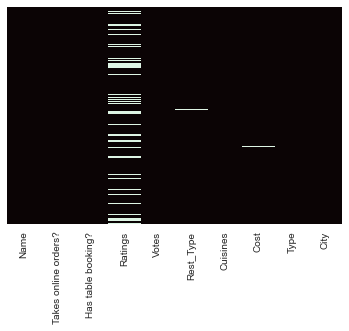

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='mako') #show heatmap of missing data each columns in dataframe.

In [19]:
""" Looking at the above heatmap, we can see a few missing values, particularly in the ‘Ratings’ column. Seeing that now not a good deal of facts is lacking within the other columns, we can drop the corresponding rows. """
df = df.dropna() #remove missing data from dataframe.
df.shape #The DataFrame reduces to the shape – (41190,10).

(41190, 10)

Takes online orders?
Yes    27046
No     14144
Name: count, dtype: int64


' It is evident from the above graph that in nearly 66% of restaurants, an online ordering facility is available. '

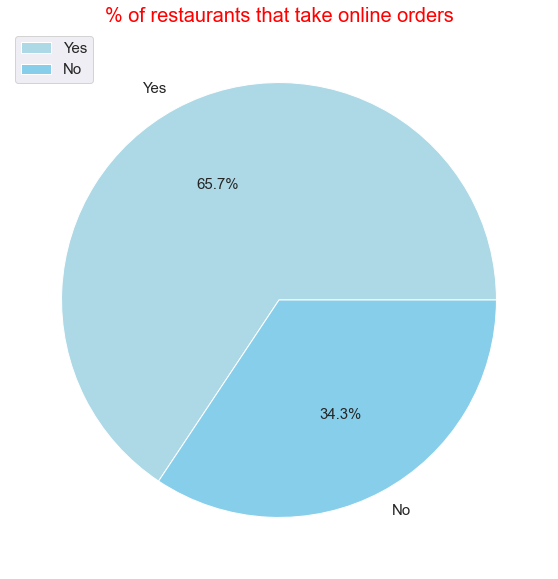

In [20]:
# Exploratory Data Analysis
""" How many restaurants in Bangalore take online orders? """
print(df['Takes online orders?'].value_counts()) #print total online orders
plt.figure(figsize=(30,10))
df['Takes online orders?'].value_counts().plot(kind='pie',colors=['lightblue','skyblue'],autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('% of restaurants that take online orders',size=20, color='red')
plt.xlabel('',size=15)
plt.ylabel('',size=15)
plt.legend(loc=2, prop={'size': 15})
""" It is evident from the above graph that in nearly 66% of restaurants, an online ordering facility is available. """

Has table booking?
No     34915
Yes     6275
Name: count, dtype: int64


' The above pie chart shows that approximately 85% of the restaurants in Bangalore do not have a table booking facility through Zomato. '

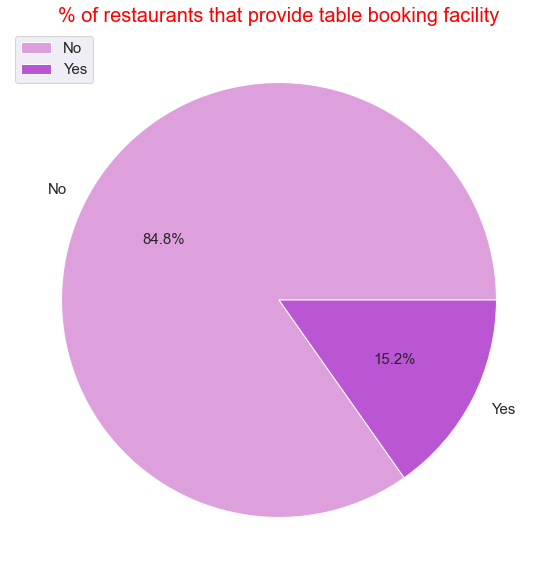

In [21]:
""" What percentage of restaurants offer table booking facilities? """
print(df['Has table booking?'].value_counts())
plt.figure(figsize=(30,10))
df['Has table booking?'].value_counts().plot(kind='pie',colors=['plum','mediumorchid'],autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('% of restaurants that provide table booking facility',size=20,color='red')
plt.xlabel('',size=15)
plt.ylabel('',size=15)
plt.legend(loc=2, prop={'size': 15})
""" The above pie chart shows that approximately 85% of the restaurants in Bangalore do not have a table booking facility through Zomato. """

' Most of the restaurants in Bangalore received a rating of 3.6 to 4. Very few restaurants have poor ratings, and quite a group of restaurants has excellent ratings of 4.9 or 5. '

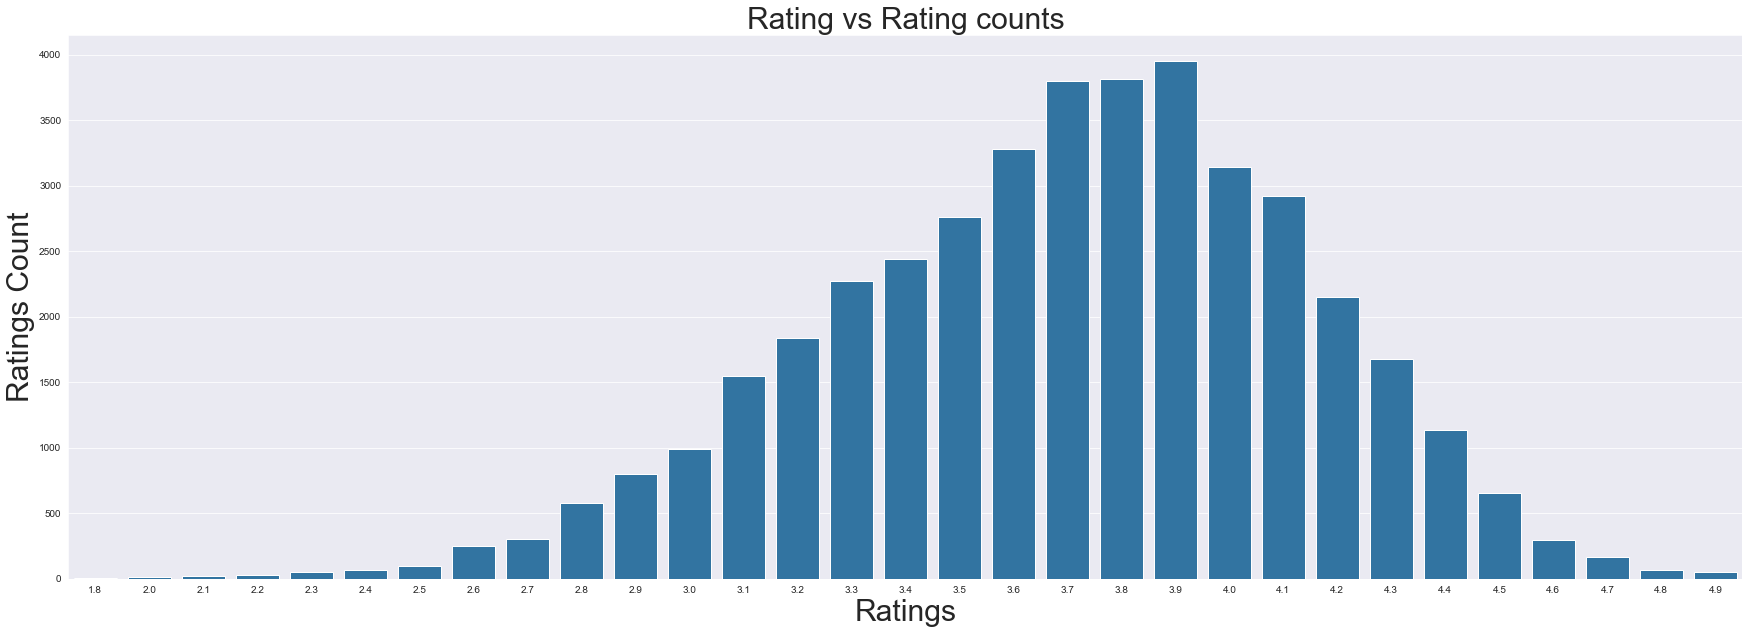

In [22]:
""" What was the most common rating? """
ratings = df.groupby(['Ratings']).size().reset_index().rename(columns={0:"Rating_Count"})
plt.figure(figsize=(30,10))
sns.barplot(x='Ratings',y='Rating_Count',data=ratings)
plt.title('Rating vs Rating counts',size=30)
plt.xlabel('Ratings',size=30)
plt.ylabel('Ratings Count',size=30)
""" Most of the restaurants in Bangalore received a rating of 3.6 to 4. Very few restaurants have poor ratings, and quite a group of restaurants has excellent ratings of 4.9 or 5. """

C:\Users\w-arm\AppData\Local\Temp\ipykernel_33728\1698302605.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


' As we can see, restaurants that cost less have better reviews than restaurants that are expensive. '

<Figure size 2160x720 with 0 Axes>

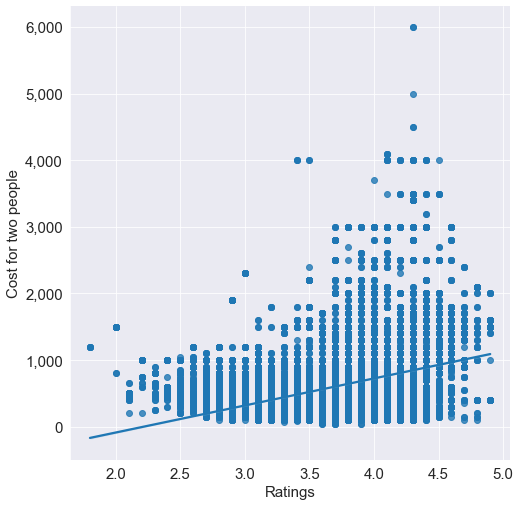

In [23]:
""" Is there any correlation between the two people’s approximated cost and a restaurant’s ratings? """
plt.figure(figsize=(30,10))
sns.lmplot(x='Ratings',y='Cost',data=df,height=7)
plt.xlabel('Ratings',size=15)
plt.ylabel('Cost for two people',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
""" As we can see, restaurants that cost less have better reviews than restaurants that are expensive. """

In [24]:
""" Top 5 cities in Bangalore that have a maximum number of high and low-rated restaurants. """
a = df.groupby('City')['Ratings'].mean().reset_index().sort_values(by='Ratings',ascending=False)
print(a.head())

              City   Ratings
7    Church Street  3.801338
5     Brigade Road  3.800742
21         MG Road  3.799536
27  Residency Road  3.778720
20    Lavelle Road  3.774948


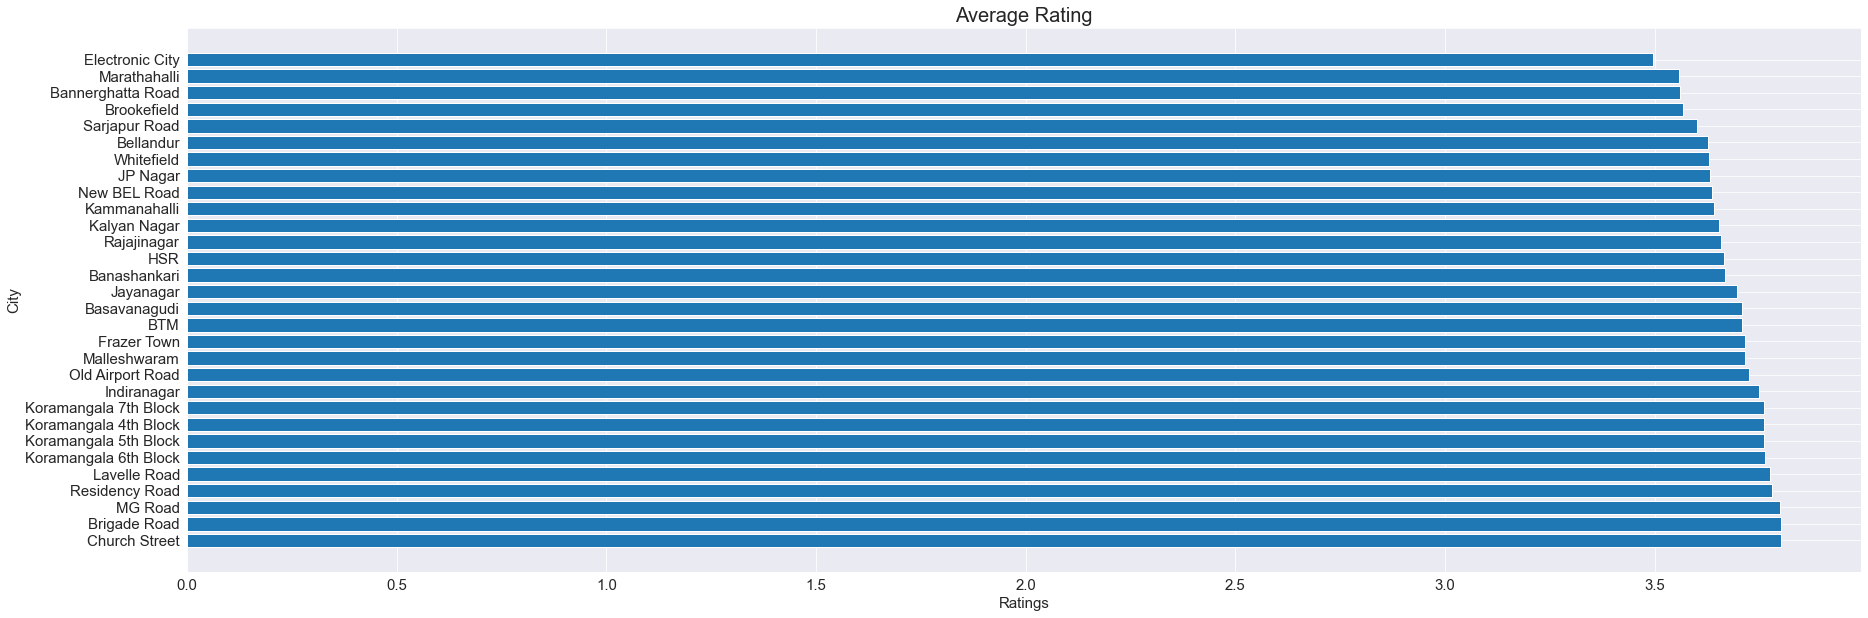

' High-rated restaurants are most commonly found in Church Street, Brigade Road, and MG Road, while Electronic City has the lowest number of high-rated restaurants. '

In [25]:
plt.figure(figsize=(30,10))
plt.barh(a.City,a.Ratings)
plt.xlabel('Ratings',size=15)
plt.ylabel('City',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Average Rating',size=20)
plt.show()
""" High-rated restaurants are most commonly found in Church Street, Brigade Road, and MG Road, while Electronic City has the lowest number of high-rated restaurants. """

In [26]:
""" Which cuisine do customers like the most?
Assuming that customers give desirable ratings to their favorite cuisines, the subsequent evaluation is being done: """

b = df.groupby('Cuisines')['Ratings'].mean().reset_index().sort_values(by='Ratings',ascending=False)
print(b.head(5))

""" Using searching for the above facts, it may be interpreted that Continental, North Indian, and Italian meals are popular among the restaurant customers in Bangalore. """

                                               Cuisines  Ratings
1001  Continental, North Indian, Italian, South Indi...      4.9
1274                 Healthy Food, Salad, Mediterranean      4.9
172                         Asian, Chinese, Thai, Momos      4.9
989   Continental, North Indian, Chinese, European, ...      4.8
192             Asian, Mediterranean, North Indian, BBQ      4.8


' Using searching for the above facts, it may be interpreted that Continental, North Indian, and Italian meals are popular among the restaurant customers in Bangalore. '

                 Type         Cost
3            Desserts   409.114064
2            Delivery   495.254631
1               Cafes   646.426208
4            Dine-out   655.081851
0              Buffet  1316.548463
6       Pubs and bars  1336.031746
5  Drinks & nightlife  1454.190751


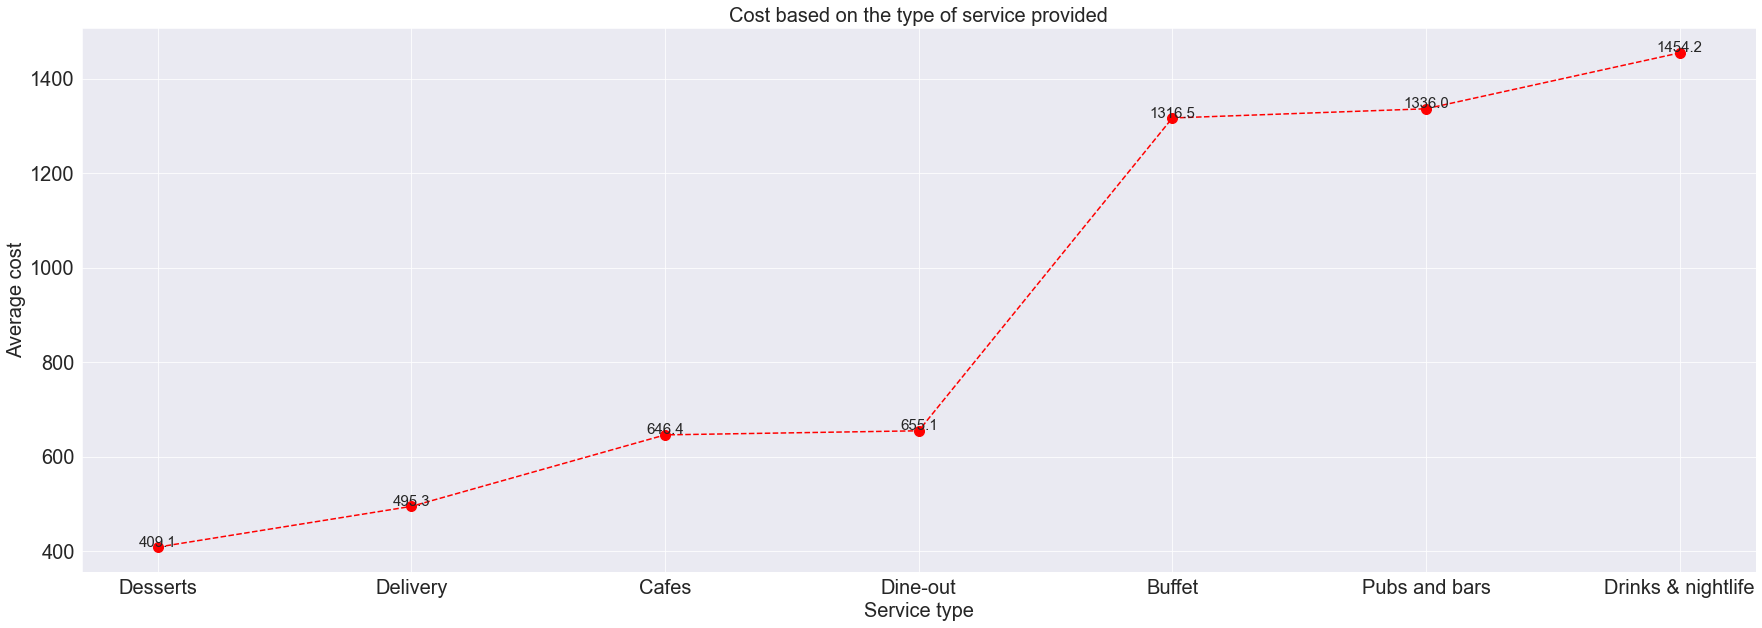

' According to the line graph above, while desserts were the least expensive type of food, restaurants that served buffets and drinks cost more than Rs.1300 for two people. '

In [27]:
""" What is the average price for two people based on the type of service? """

d = df.groupby('Type')['Cost'].mean().reset_index().sort_values(by='Cost')
print(d)
plt.figure(figsize=(30,10))
plt.plot(d['Type'],d['Cost'],'o--r',ms=10)
plt.xlabel('Service type',size=20)
plt.ylabel('Average cost',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Cost based on the type of service provided',size=20)
for i,e in enumerate(d.Cost):
    plt.text(i,e+1,round(e,1),fontsize=15,horizontalalignment='center')
plt.show()
""" According to the line graph above, while desserts were the least expensive type of food, restaurants that served buffets and drinks cost more than Rs.1300 for two people. """

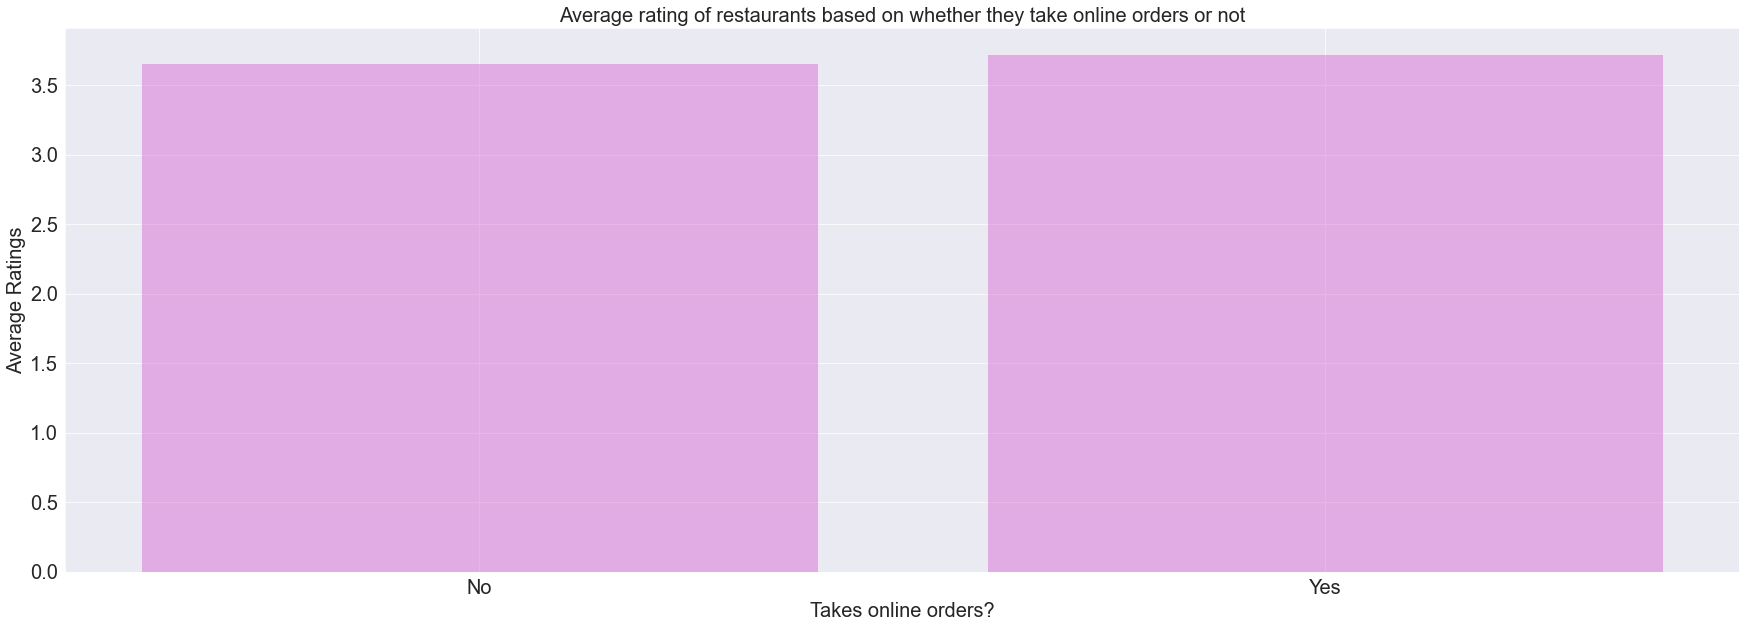

' Restaurants receive almost the same average ratings from customers irrespective of whether they take online orders or not. It can be concluded that a restaurant’s success does not largely depend on the facility of taking online orders. '

In [28]:
""" Does the restaurant’s rating depend on whether it accepts online orders or not? """
grp1=df.groupby('Takes online orders?')['Ratings'].mean().reset_index()
plt.figure(figsize=(30,10))
plt.bar(grp1['Takes online orders?'],grp1['Ratings'],alpha=0.5,color='orchid')
plt.xlabel('Takes online orders?',size=20)
plt.ylabel('Average Ratings',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Average rating of restaurants based on whether they take online orders or not',size=20)
plt.show()
""" Restaurants receive almost the same average ratings from customers irrespective of whether they take online orders or not. It can be concluded that a restaurant’s success does not largely depend on the facility of taking online orders. """

                                Name   Ratings
943      Byg Brewski Brewing Company  4.900000
420   Asia Kitchen By Mainland China  4.900000
4886                Sant Spa Cuisine  4.900000
4445                    Punjab Grill  4.871429
624           Belgian Waffle Factory  4.844828
5979                The Pizza Bakery  4.800000
1977                        Flechazo  4.800000
4102                 OG Variar  Sons  4.800000
88           ABs  Absolute Barbecues  4.789474
703                       Biergarten  4.766667


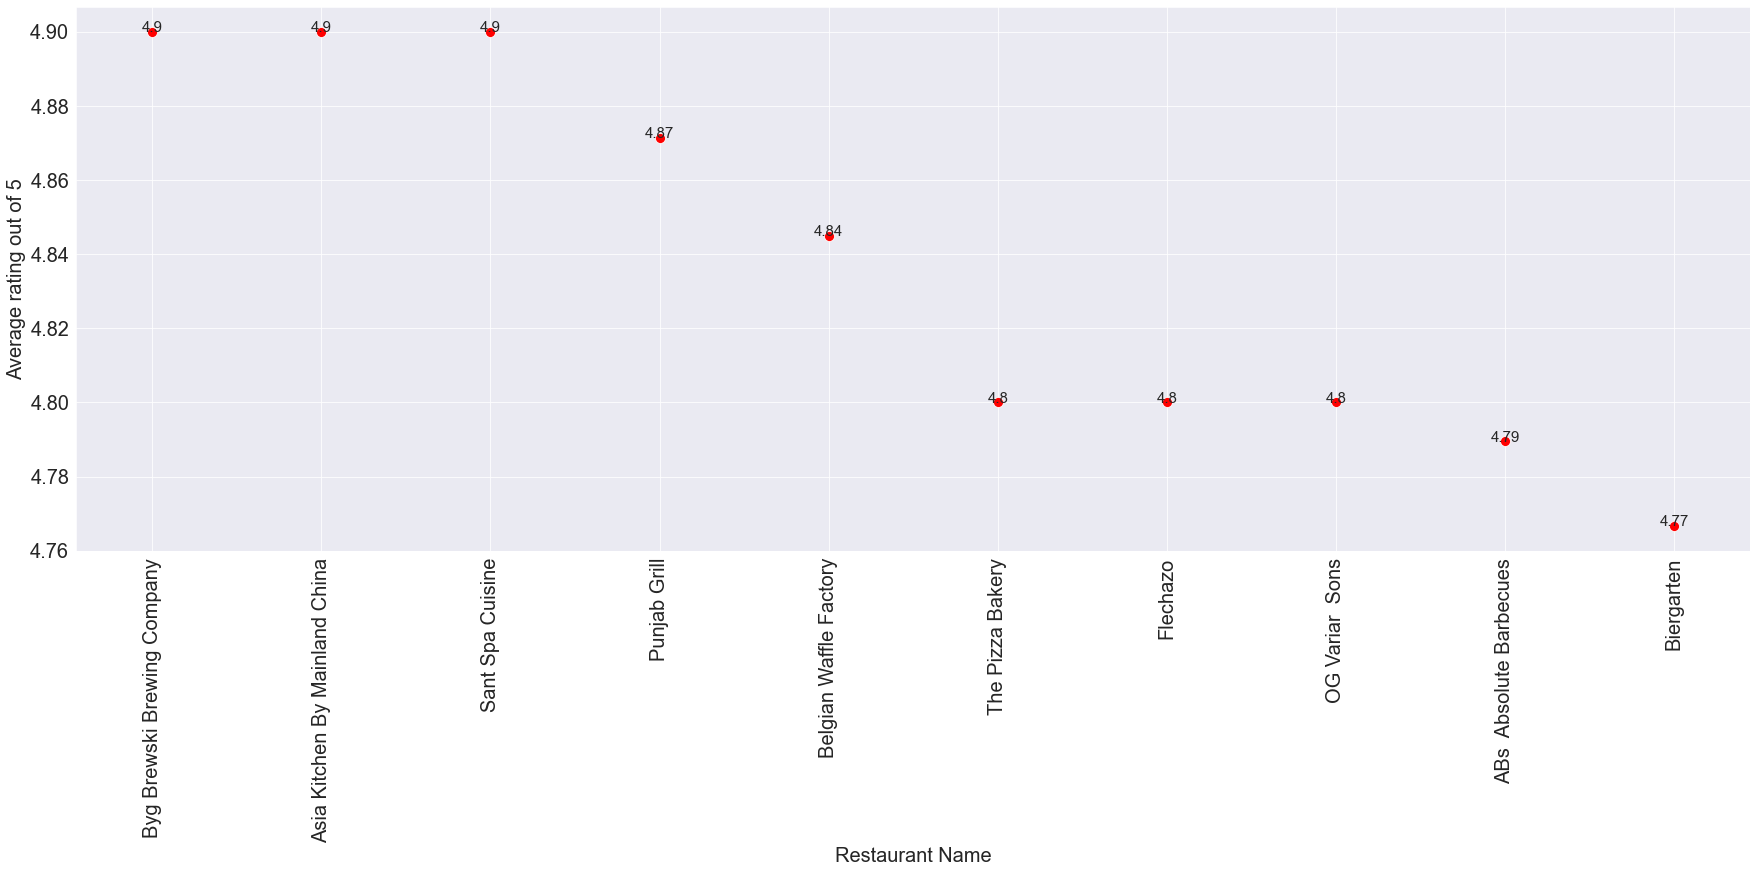

In [29]:
""" What are the top 10 highest-rated restaurants?
Often or not, many customers visit a place or choose a place to eat by looking at the restaurant’s ratings. So let us find out the top 10 restaurants that people visit. """

grp2 = df.groupby('Name')['Ratings'].mean().reset_index().sort_values(by='Ratings',ascending=False)[0:10]
print(grp2)

""" These restaurants happen to receive the highest ratings from customers. """

plt.figure(figsize=(30,10))
sns.scatterplot(x=grp2.Name, y=grp2.Ratings, s=100, color='red') #I add X and Y
for i,e in enumerate(grp2.Ratings):
    plt.text(i,e,round(e,2),fontsize=15,horizontalalignment='center')
plt.xlabel('Restaurant Name',size=20)
plt.ylabel('Average rating out of 5',size=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20,rotation=90)
plt.show()